### Importing Libraries
This cell imports essential libraries required for data processing, visualization, and machine learning.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, ConfusionMatrixDisplay

import zipfile
import os

### Loading Datasets
This cell loads the training and testing datasets using `pandas.read_csv()`.

In [2]:
# Load datasets
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

### Displaying First Few Rows
To get an overview of the dataset, this cell displays the first few rows using `train_data.head()`.

In [3]:
# Display first few rows
print("First few rows of the dataset:")
display(train_data.head())

First few rows of the dataset:


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


### Displaying Dataset Information
This cell prints the dataset's structure, including column names, data types, and non-null values using `train_data.info()`.

In [4]:
# Display dataset information
print("Dataset Information:")
train_data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes

### Handling Missing Data
This cell identifies numerical and categorical columns, imputes missing numerical values with the median, and replaces missing categorical values with the mode.

In [5]:
# Handle Missing Data
# Check if 'Response' column exists
if "Response" not in train_data.columns:
    print("Error: 'Response' column is missing from train_data! Check your dataset.")

else:
    # Identify numerical and categorical columns (excluding 'Response' from numerical)
    numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.drop("Response", errors="ignore")
    categorical_cols = train_data.select_dtypes(include=['object']).columns

    # Impute missing numerical values with median
    for col in numerical_cols:
        median_value = train_data[col].median()
        train_data[col].fillna(median_value, inplace=True)
        test_data[col].fillna(median_value, inplace=True)  # Use train's median for consistency

    # Impute missing categorical values with mode
    for col in categorical_cols:
        mode_value = train_data[col].mode()[0]
        train_data[col].fillna(mode_value, inplace=True)
        test_data[col].fillna(mode_value, inplace=True)

    print("Missing values handled successfully!")


Missing values handled successfully!


C:\Users\AS5560\AppData\Local\Temp\ipykernel_25508\3316018772.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(median_value, inplace=True)
C:\Users\AS5560\AppData\Local\Temp\ipykernel_25508\3316018772.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

### Encoding and Scaling Data
Applies label encoding to categorical features and standard scaling to numerical features to prepare them for machine learning models.

In [6]:
# Encode categorical features
categorical_cols = ["Accomodation_Type", "Reco_Insurance_Type"]
label_enc = LabelEncoder()
for col in categorical_cols:
    train_data[col] = label_enc.fit_transform(train_data[col])
    test_data[col] = label_enc.transform(test_data[col])

In [7]:
# Drop 'ID' column if exists
if 'ID' in train_data.columns:
    train_data.drop("ID", axis=1, inplace=True)
else:
    print("No 'ID' column found in train_data.")

if 'ID' in test_data.columns:
    test_IDs = test_data["ID"]
    test_data.drop("ID", axis=1, inplace=True)
else:
    print("No 'ID' column found in test_data.")

In [8]:
# Define features & target variable
X = train_data.drop("Response", axis=1)
y = train_data["Response"]

### Splitting Data
This cell splits the dataset into training and testing sets using `train_test_split()`.

In [9]:
# Split data into train & validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Ensure all features are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_val = X_val.apply(pd.to_numeric, errors='coerce')
test_data = test_data.apply(pd.to_numeric, errors='coerce')

### Handling Missing Data
This cell identifies numerical and categorical columns, imputes missing numerical values with the median, and replaces missing categorical values with the mode.

In [11]:
# Handle NaN values after conversion
X_train.fillna(-1, inplace=True)
X_val.fillna(-1, inplace=True)
test_data.fillna(-1, inplace=True)

### Encoding and Scaling Data
This cell applies label encoding to categorical features and standard scaling to numerical features to prepare them for machine learning models.

In [12]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_data = scaler.transform(test_data)

### Training Machine Learning Models
Below cells trains multiple machine learning models including Random Forest, Gradient Boosting, and others to predict the target variable.

In [13]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [14]:
# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [15]:
# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=200, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [16]:
# Train Logistic Regression model
log_reg_model = LogisticRegression(max_iter=500, random_state=42)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [17]:
# Train SVM model
svm_model = SVC(kernel="linear", probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [18]:
# Predict probabilities for each model
y_val_pred_rf = rf_model.predict_proba(X_val)[:, 1]
y_val_pred_gb = gb_model.predict_proba(X_val)[:, 1]
y_val_pred_xgb = xgb_model.predict_proba(X_val)[:, 1]
y_val_pred_log_reg = log_reg_model.predict_proba(X_val)[:, 1]
y_val_pred_svm = svm_model.predict_proba(X_val)[:, 1]

In [19]:
# Convert predicted probabilities to binary (threshold: 0.5)
y_val_pred_rf_binary = (y_val_pred_rf >= 0.5).astype(int)
y_val_pred_gb_binary = (y_val_pred_gb >= 0.5).astype(int)
y_val_pred_xgb_binary = (y_val_pred_xgb >= 0.5).astype(int)
y_val_pred_log_reg_binary = (y_val_pred_log_reg >= 0.5).astype(int)
y_val_pred_svm_binary = (y_val_pred_svm >= 0.5).astype(int)

### Feature Importance Graph

The feature importance graph is a visualization of the importance of each feature in the model. It is a useful tool for understanding which features are most influential in the model's predictions.

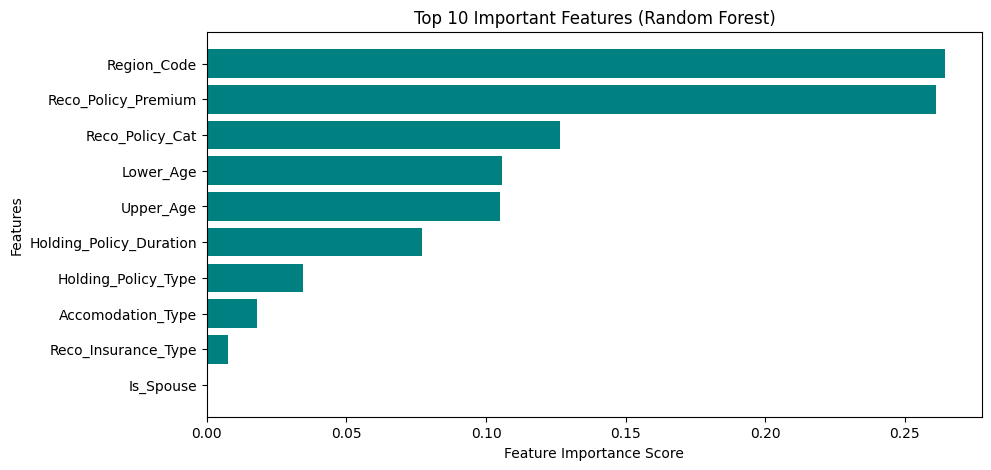

In [20]:
# Feature Importance using Random Forest
plt.figure(figsize=(10, 5))
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[-10:]  # Top 10 Features
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx], color="teal")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

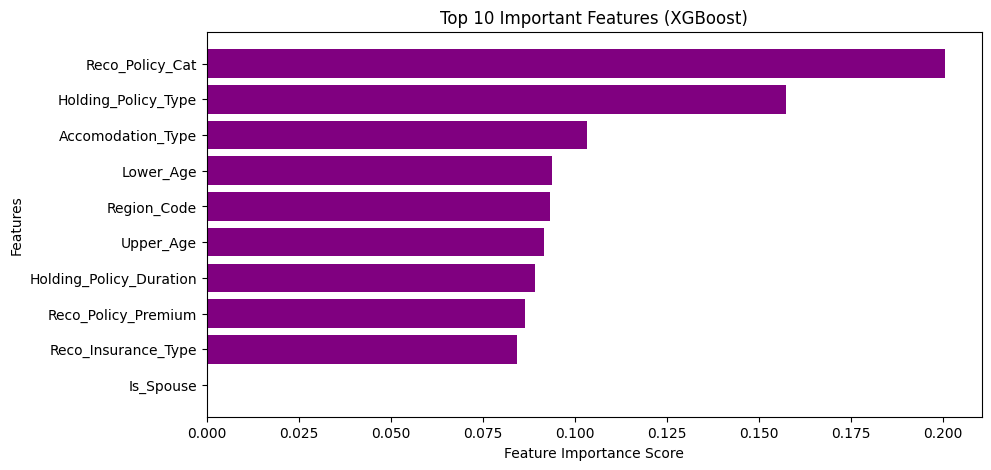

In [21]:
# Feature Importance using XGBoost
plt.figure(figsize=(10, 5))
xgb_importance = xgb_model.feature_importances_
sorted_xgb_idx = np.argsort(xgb_importance)[-10:]
plt.barh(X.columns[sorted_xgb_idx], xgb_importance[sorted_xgb_idx], color="purple")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features (XGBoost)")
plt.show()

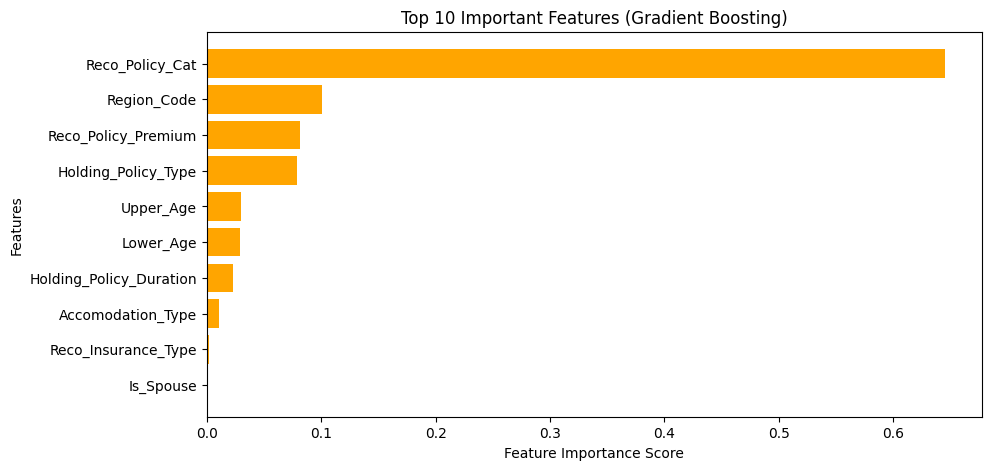

In [22]:
# Feature Importance using Gradient Boosting
plt.figure(figsize=(10, 5))
gb_importance = gb_model.feature_importances_
sorted_gb_idx = np.argsort(gb_importance)[-10:]
plt.barh(X.columns[sorted_gb_idx], gb_importance[sorted_gb_idx], color="orange")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features (Gradient Boosting)")
plt.show()

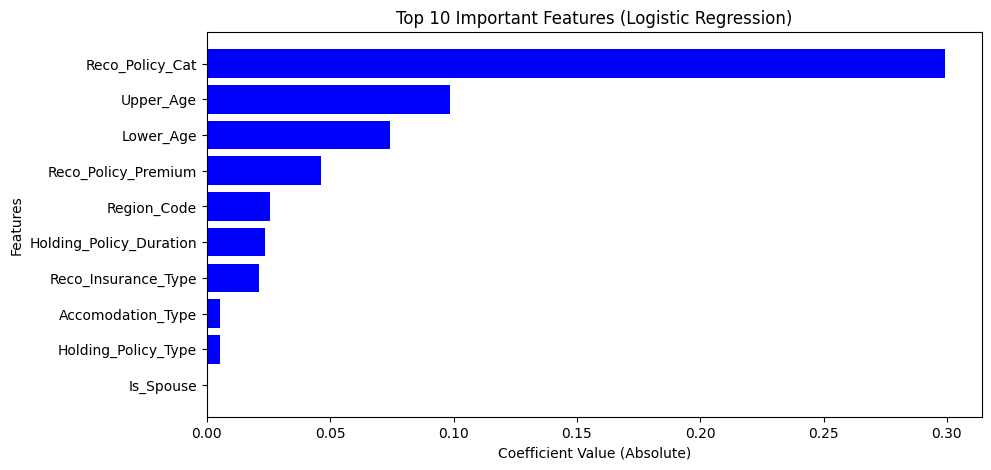

In [23]:
# Feature Importance using Logistic Regression (absolute coefficients)
plt.figure(figsize=(10, 5))
log_reg_importance = np.abs(log_reg_model.coef_).flatten()
sorted_log_reg_idx = np.argsort(log_reg_importance)[-10:]
plt.barh(X.columns[sorted_log_reg_idx], log_reg_importance[sorted_log_reg_idx], color="blue")
plt.xlabel("Coefficient Value (Absolute)")
plt.ylabel("Features")
plt.title("Top 10 Important Features (Logistic Regression)")
plt.show()

<Figure size 1000x500 with 0 Axes>

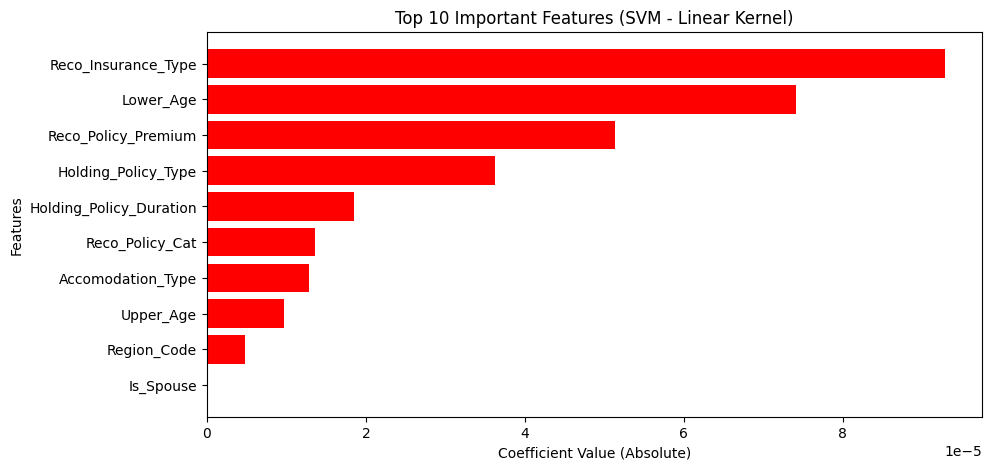

In [24]:
# Feature Importance using SVM (absolute coefficients)
plt.figure(figsize=(10, 5))

# Extract feature importance
svm_importance = np.abs(svm_model.coef_).flatten()
sorted_svm_idx = np.argsort(svm_importance)[-10:]

# Plot
plt.figure(figsize=(10, 5))
plt.barh(X.columns[sorted_svm_idx], svm_importance[sorted_svm_idx], color="red")
plt.xlabel("Coefficient Value (Absolute)")
plt.ylabel("Features")
plt.title("Top 10 Important Features (SVM - Linear Kernel)")
plt.show()

### Evaluating Model Performance
This cell calculates the AUC-ROC score to assess model performance.

In [25]:
# Calculate ROC-AUC for each model
roc_auc_rf = roc_auc_score(y_val, y_val_pred_rf)
roc_auc_gb = roc_auc_score(y_val, y_val_pred_gb)
roc_auc_xgb = roc_auc_score(y_val, y_val_pred_xgb)
roc_auc_log_reg = roc_auc_score(y_val, y_val_pred_log_reg)
roc_auc_svm = roc_auc_score(y_val, y_val_pred_svm)

In [26]:
# Print ROC-AUC scores
print(f"ROC-AUC score for Random Forest: {roc_auc_rf:.4f}")
print(f"ROC-AUC score for Gradient Boosting: {roc_auc_gb:.4f}")
print(f"ROC-AUC score for XGBoost: {roc_auc_xgb:.4f}")
print(f"ROC-AUC score for Logistic Regression: {roc_auc_log_reg:.4f}")
print(f"ROC-AUC score for SVM: {roc_auc_svm:.4f}")

ROC-AUC score for Random Forest: 0.6047
ROC-AUC score for Gradient Boosting: 0.6352
ROC-AUC score for XGBoost: 0.6307
ROC-AUC score for Logistic Regression: 0.5601
ROC-AUC score for SVM: 0.4780


In [27]:
# Define models dictionary BEFORE using models.keys()
models = {
    "Random Forest": y_val_pred_rf_binary,
    "Gradient Boosting": y_val_pred_gb_binary,
    "XGBoost": y_val_pred_xgb_binary,
    "Logistic Regression": y_val_pred_log_reg_binary,
    "SVM Model": y_val_pred_svm_binary
}

### Selection of the best model
The best model is selected based on ROC-AUC score. The model with the highest ROC-AUC score is considered the best model.

In [28]:
# Select best model based on ROC-AUC score
roc_auc_scores = {
    "Random Forest": roc_auc_rf,
    "Gradient Boosting": roc_auc_gb,
    "XGBoost": roc_auc_xgb,
    "Logistic Regression": roc_auc_log_reg,
    "SVM": roc_auc_svm
}

best_model_name = max(roc_auc_scores, key=roc_auc_scores.get)
print(f"Best model selected: {best_model_name}")

if best_model_name == "Random Forest":
    best_model = rf_model
elif best_model_name == "Gradient Boosting":
    best_model = gb_model
elif best_model_name == "XGBoost":
    best_model = xgb_model
elif best_model_name == "Logistic Regression":
    best_model = log_reg_model
else:
    best_model = svm_model

Best model selected: Gradient Boosting


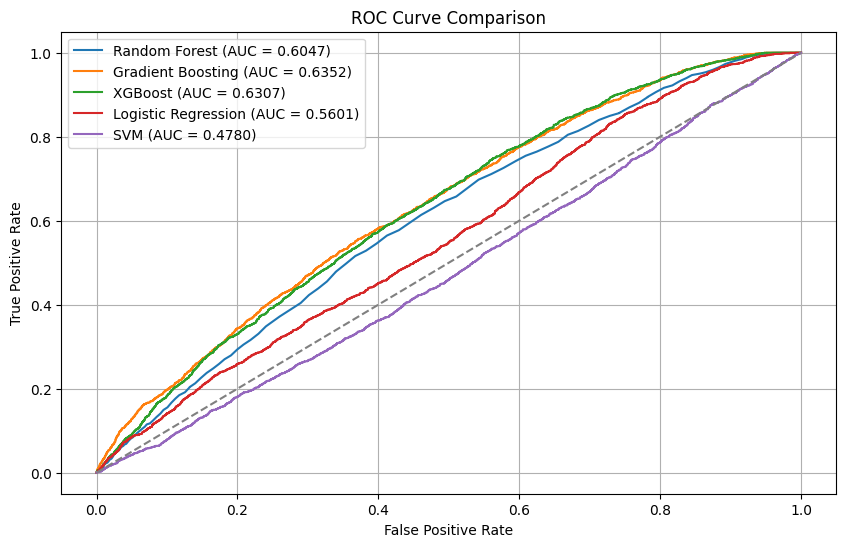

In [29]:
# Plot ROC Curves for all models
plt.figure(figsize=(10, 6))

# Define model predictions and labels
model_preds = {
    "Random Forest": y_val_pred_rf,
    "Gradient Boosting": y_val_pred_gb,
    "XGBoost": y_val_pred_xgb,
    "Logistic Regression": y_val_pred_log_reg,
    "SVM": y_val_pred_svm
}

# Plot ROC Curves
for model_name, y_pred in model_preds.items():
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_scores[model_name]:.4f})")

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

# Formatting the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()

# Show plot
plt.show()


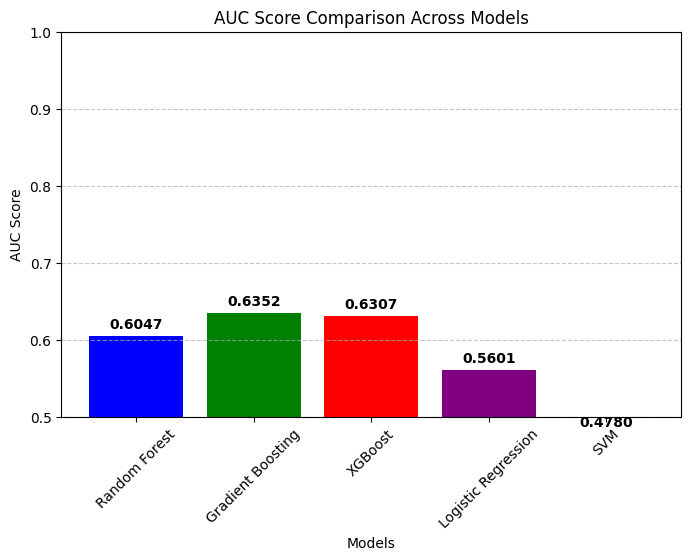

In [30]:
# Plot AUC Scores as a Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(roc_auc_scores.keys(), roc_auc_scores.values(), color=["blue", "green", "red", "purple"])
plt.xlabel("Models")
plt.ylabel("AUC Score")
plt.title("AUC Score Comparison Across Models")
plt.ylim(0.5, 1)  # Ensures a consistent scale
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display AUC values on bars
for i, v in enumerate(roc_auc_scores.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha="center", fontsize=10, fontweight="bold")
plt.show()

C:\Python\Python3.13\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python\Python3.13\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python\Python3.13\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python\Python3.13\Lib\site-packages\sklearn\metri

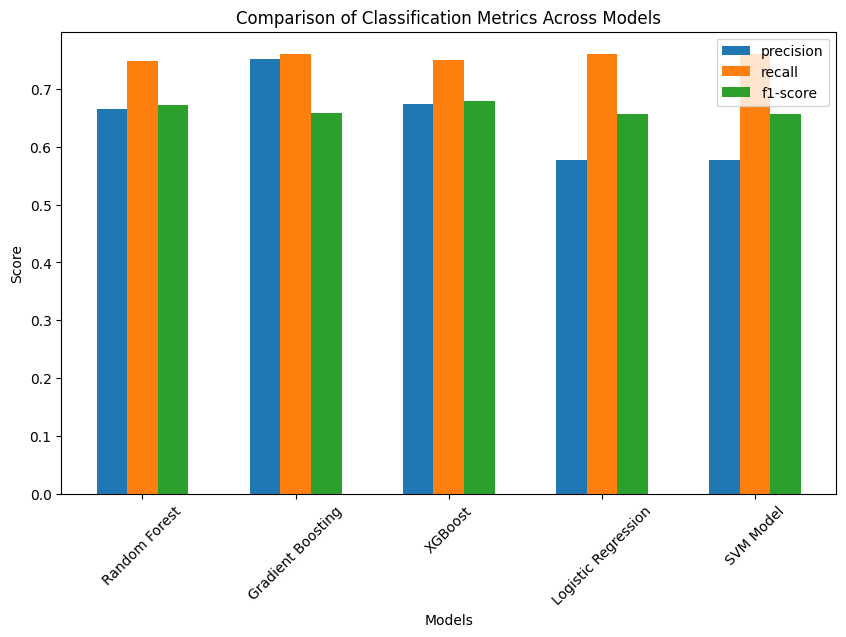

In [31]:
# Collect classification report data
metrics = ["precision", "recall", "f1-score"]
model_names = list(models.keys())

# Initialize a dictionary to store scores
scores = {metric: [] for metric in metrics}

# Extract scores from classification reports
for model_name, y_pred in models.items():
    report = classification_report(y_val, y_pred, output_dict=True)
    for metric in metrics:
        scores[metric].append(report["weighted avg"][metric])

# Plot bar chart
x = np.arange(len(model_names))  # the label locations
width = 0.2  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, scores[metric], width, label=metric)

# Formatting the plot
ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Comparison of Classification Metrics Across Models")
ax.set_xticks(x + width)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()

plt.show()



Classification Report for Random Forest:

              precision    recall  f1-score       support
0              0.764544  0.966774  0.853848   7735.000000
1              0.351010  0.056921  0.097956   2442.000000
accuracy       0.748452  0.748452  0.748452      0.748452
macro avg      0.557777  0.511847  0.475902  10177.000000
weighted avg   0.665315  0.748452  0.672470  10177.000000


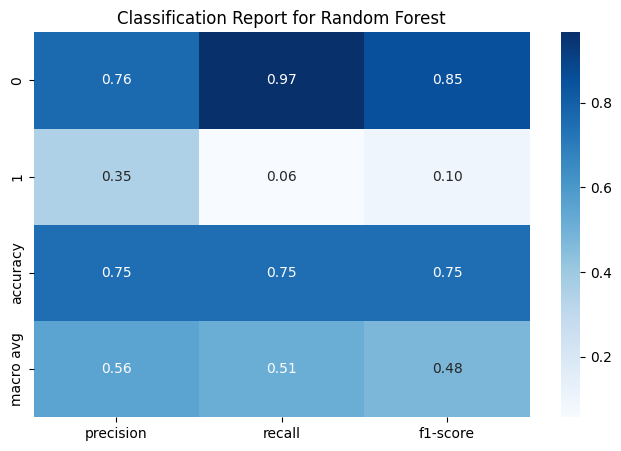


Classification Report for Gradient Boosting:

              precision    recall  f1-score       support
0              0.760902  0.999354  0.863977   7735.000000
1              0.722222  0.005324  0.010569   2442.000000
accuracy       0.760833  0.760833  0.760833      0.760833
macro avg      0.741562  0.502339  0.437273  10177.000000
weighted avg   0.751620  0.760833  0.659199  10177.000000


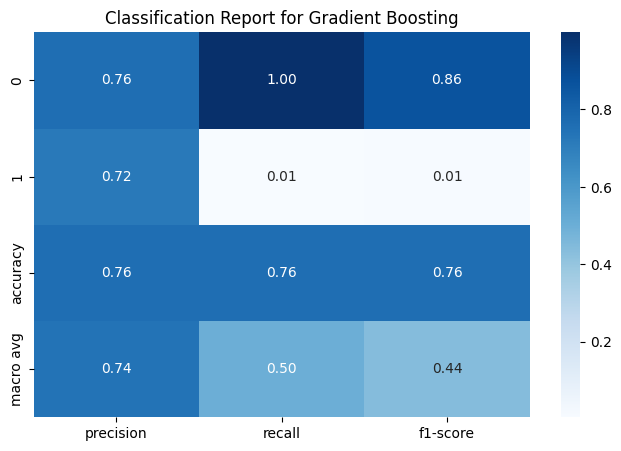


Classification Report for XGBoost:

              precision    recall  f1-score       support
0              0.766972  0.962508  0.853687   7735.000000
1              0.382979  0.073710  0.123626   2442.000000
accuracy       0.749238  0.749238  0.749238      0.749238
macro avg      0.574976  0.518109  0.488656  10177.000000
weighted avg   0.674832  0.749238  0.678507  10177.000000


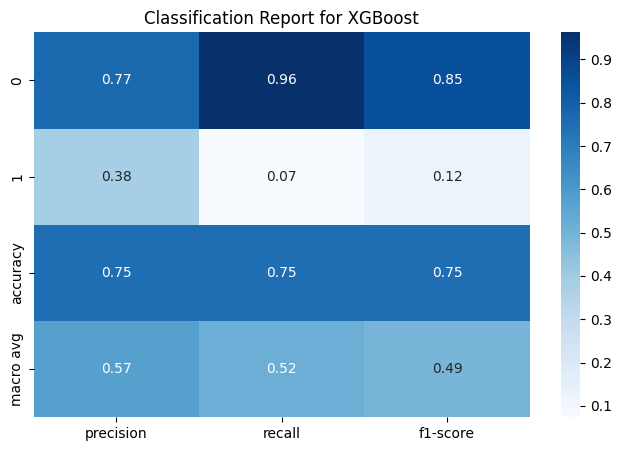


Classification Report for Logistic Regression:

              precision    recall  f1-score       support
0              0.760047  1.000000  0.863667   7735.000000
1              0.000000  0.000000  0.000000   2442.000000
accuracy       0.760047  0.760047  0.760047      0.760047
macro avg      0.380024  0.500000  0.431833  10177.000000
weighted avg   0.577672  0.760047  0.656428  10177.000000


C:\Python\Python3.13\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python\Python3.13\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python\Python3.13\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


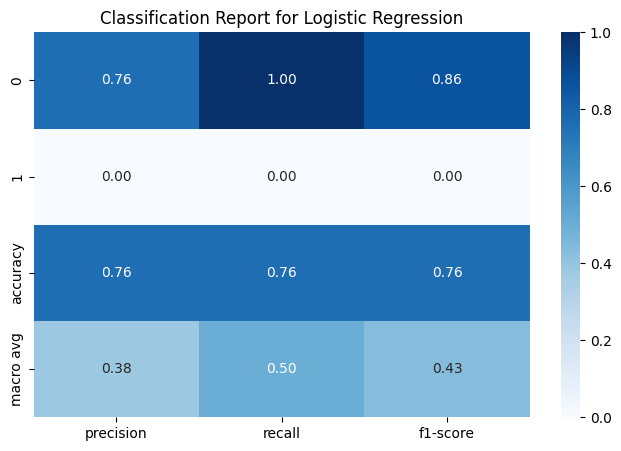


Classification Report for SVM Model:

              precision    recall  f1-score       support
0              0.760047  1.000000  0.863667   7735.000000
1              0.000000  0.000000  0.000000   2442.000000
accuracy       0.760047  0.760047  0.760047      0.760047
macro avg      0.380024  0.500000  0.431833  10177.000000
weighted avg   0.577672  0.760047  0.656428  10177.000000


C:\Python\Python3.13\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python\Python3.13\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python\Python3.13\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


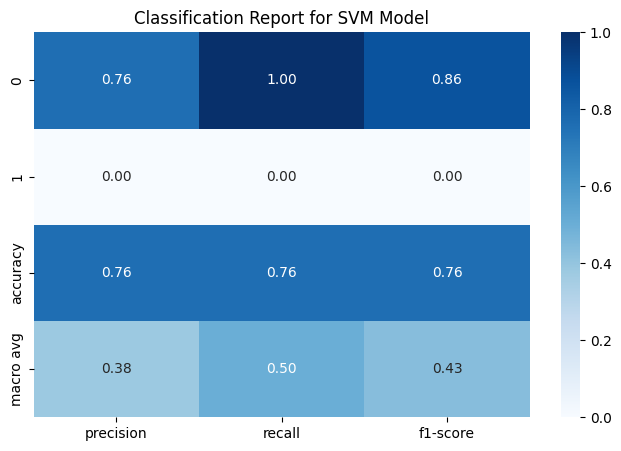

In [32]:
# Classification Report
for model_name, y_pred in models.items():
    print(f"\nClassification Report for {model_name}:\n")
    report = classification_report(y_val, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    print(df_report)

    # Plot classification report heatmap
    plt.figure(figsize=(8, 5))
    sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
    plt.title(f'Classification Report for {model_name}')
    plt.show()

In [33]:
# Final prediction on the test data
y_test_pred = best_model.predict_proba(test_data)[:, 1]

In [34]:
# Convert response to binary (threshold: 0.5)
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)

In [35]:
# Save submission files
os.makedirs("submission_folder", exist_ok=True)

submission = pd.DataFrame({"ID": test_IDs, "Response": y_test_pred})
submission.to_csv("submission_folder/submission.csv", index=False)

submission_binary = pd.DataFrame({"ID": test_IDs, "Response": y_test_pred_binary})
submission_binary.to_csv("submission_folder/submission_binary.csv", index=False)

In [36]:
# Create a zip file with both submissions
zipf = zipfile.ZipFile("submission.zip", "w", zipfile.ZIP_DEFLATED)
for file in ["submission.csv", "submission_binary.csv"]:
    zipf.write(f"submission_folder/{file}", file)
zipf.close()

print("Submission zip file created successfully!")

Submission zip file created successfully!
